# Load in Boston housing data set and train NGBoost model

In [1]:
from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = load_boston(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test.flatten()).mean()
print('Test NLL', test_NLL)

[iter 0] loss=3.6453 val_loss=0.0000 scale=1.0000 norm=6.7177
[iter 100] loss=2.7481 val_loss=0.0000 scale=2.0000 norm=5.1327
[iter 200] loss=2.1917 val_loss=0.0000 scale=2.0000 norm=3.4899
[iter 300] loss=1.9155 val_loss=0.0000 scale=1.0000 norm=1.5030
[iter 400] loss=1.7720 val_loss=0.0000 scale=1.0000 norm=1.3850
Test MSE 11.541483073979363
Test NLL 3.4843859354126776


# Feature importance for each parameter

In [2]:
## Feature importance for loc trees
feature_importance_loc = ngb.feature_importances_[0]
feature_importance_loc

array([0.08313541, 0.00483749, 0.03487986, 0.00506578, 0.07455847,
       0.21373237, 0.05695768, 0.15634028, 0.02022273, 0.061031  ,
       0.07139797, 0.05742003, 0.16042095])

In [3]:
## Feature importance for scale trees
feature_importance_scale = ngb.feature_importances_[1]
feature_importance_scale

array([6.08034687e-02, 3.71519377e-03, 1.75052224e-02, 4.54952788e-05,
       1.46712218e-01, 2.13197681e-01, 6.02199663e-02, 1.40484839e-01,
       2.25397169e-02, 6.02413196e-02, 3.68044107e-02, 5.61480819e-02,
       1.81582387e-01])

Text(0.5, 1.0, 'scale param')

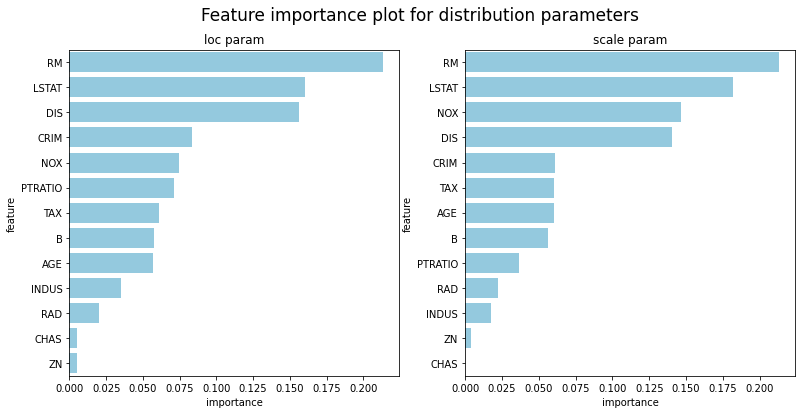

In [4]:
df_loc = pd.DataFrame({'feature':load_boston()['feature_names'], 
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False)
df_scale = pd.DataFrame({'feature':load_boston()['feature_names'], 
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").set_title('scale param')